# How where Pitchfork reviews affected by being acquired by Conde Nast?

Pitchfork is an online magazine that was started in 1999 with the focus of reviewing music in the independent music scene. On October 13, 2015 Pitchfork was aquired by media giant Conde Nast. As a long time fan of Pitchfork, I am concerned that this acquisition may have resulted in reviews that are more biased or dishonest.

In this project we'll analyze the reviews published by Pitchfork before and after the acquisition to determine if there are any changes in the reviews.

The dataset I will be using was created by Andrew Thompson and is available here: https://components.one/datasets/pitchfork-reviews-dataset/. The dataset contain all pitchfork reviews from January 5, 1999 to January 11, 2019.

The database is in sqlite format so we first use the sqlite3 python library to connect to the database.

In [1]:
import sqlite3

#Create a SQL connection to database
con = sqlite3.connect("pitchfork.db")
cur = con.cursor()

In [2]:
#get list of tables in database
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
cur.fetchall()

[('reviews',)]

Now we convert the database into a pandas dataframe

In [3]:
#read database into pandas dataframe
import pandas as pd

df = pd.read_sql_query("SELECT * FROM reviews", con)

In [4]:
df.head()

,id,artist,album,genre,score,date,author,role,review,bnm,link
0,0,David Byrne,“…The Best Live Show of All Time” — NME EP,Rock,5.5,January 11 2019,Andy Beta,Contributor,"Viva Brother, Terris, Mansun, the Twang, Joe L...",0,https://pitchfork.com/reviews/albums/david-byr...
1,1,DJ Healer,Lost Lovesongs / Lostsongs Vol. 2,Electronic,6.2,January 11 2019,Chal Ravens,Contributor,"The Prince of Denmark—that is, the proper prin...",0,https://pitchfork.com/reviews/albums/dj-healer...
2,2,Jorge Velez,Roman Birds,Electronic,7.9,January 10 2019,Philip Sherburne,Contributing Editor,"Jorge Velez has long been prolific, but that’s...",0,https://pitchfork.com/reviews/albums/jorge-vel...
3,3,Chandra,Transportation EPs,Rock,7.8,January 10 2019,Andy Beta,Contributor,When the Avalanches returned in 2016 after an ...,0,https://pitchfork.com/reviews/albums/chandra-t...
4,4,The Chainsmokers,Sick Boy,Electronic,3.1,January 9 2019,Larry Fitzmaurice,Contributor,We’re going to be stuck with the Chainsmokers ...,0,https://pitchfork.com/reviews/albums/the-chain...


Let's make sure there aren't any duplicate reviews for a single album.

In [5]:
df['album'].value_counts()

DJ-Kicks                25
II                      19
III                      9
Live                     9
Greatest Hits            7
                        ..
The Future's Void        1
Find Your Home           1
De Mel, De Melão EP      1
RR2: The Bitter Dose     1
Ganglians                1
Name: album, Length: 20179, dtype: int64

So it looks like there are a few albums that have the same name. Let's make sure that these are different albums made by different artists and not the duplicate albums.

In [6]:
df.loc[df['album'] == 'DJ-Kicks']['artist'].value_counts()

Kode9                        1
Will Saul                    1
Apparat                      1
Wolf + Lamb vs. Soul Clap    1
Lone                         1
Digitalism                   1
John Talabot                 1
Hercules and Love Affair     1
Dâm-Funk                     1
Michael Mayer                1
Gold Panda                   1
Mount Kimbie                 1
Annie                        1
Jackmaster                   1
DJ Koze                      1
The Juan MacLean             1
Matthew Dear                 1
Motor City Drum Ensemble     1
DJ Seinfeld                  1
Booka Shade                  1
Chromeo                      1
The Glimmers                 1
Scuba                        1
Moodymann                    1
James Holden                 1
Name: artist, dtype: int64

If we look at the artists associated with the most common album name, "DJ-Kicks", we can see there are no duplicate albums with that name. We can be confident that this dataset does not include duplicate albums reviews.

Lets add columns for the year and month that each review is published.

In [7]:
df['date'].value_counts()

March 31 2000       15
April 30 2000       14
March 31 2001       13
April 20 1999       12
February 20 2001    11
                    ..
August 27 2017       1
May 15 2000          1
February 4 2018      1
August 11 2000       1
November 5 2017      1
Name: date, Length: 4665, dtype: int64

In [8]:
def add_year(row):
    initial_date = str(row['date'])
    split_date = initial_date.split(' ')
    return int(split_date[2])

def add_month(row):
    months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    initial_date = str(row['date'])
    split_date = initial_date.split(' ')
    index = months.index(split_date[0])
    return index + 1

df['year'] = df.apply(lambda row: add_year(row), axis=1)
df['month'] = df.apply(lambda row: add_month(row), axis=1)
df['date'] = pd.to_datetime(df['date'])

In [9]:
df.head()

,id,artist,album,genre,score,date,author,role,review,bnm,link,year,month
0,0,David Byrne,“…The Best Live Show of All Time” — NME EP,Rock,5.5,2019-01-11,Andy Beta,Contributor,"Viva Brother, Terris, Mansun, the Twang, Joe L...",0,https://pitchfork.com/reviews/albums/david-byr...,2019,1
1,1,DJ Healer,Lost Lovesongs / Lostsongs Vol. 2,Electronic,6.2,2019-01-11,Chal Ravens,Contributor,"The Prince of Denmark—that is, the proper prin...",0,https://pitchfork.com/reviews/albums/dj-healer...,2019,1
2,2,Jorge Velez,Roman Birds,Electronic,7.9,2019-01-10,Philip Sherburne,Contributing Editor,"Jorge Velez has long been prolific, but that’s...",0,https://pitchfork.com/reviews/albums/jorge-vel...,2019,1
3,3,Chandra,Transportation EPs,Rock,7.8,2019-01-10,Andy Beta,Contributor,When the Avalanches returned in 2016 after an ...,0,https://pitchfork.com/reviews/albums/chandra-t...,2019,1
4,4,The Chainsmokers,Sick Boy,Electronic,3.1,2019-01-09,Larry Fitzmaurice,Contributor,We’re going to be stuck with the Chainsmokers ...,0,https://pitchfork.com/reviews/albums/the-chain...,2019,1


In [10]:
df['year'].value_counts()

2016    1265
2017    1247
2018    1225
2007    1216
2008    1201
2013    1200
2006    1185
2012    1185
2005    1185
2009    1171
2010    1170
2011    1165
2014    1164
2015    1135
2004    1120
2003    1060
2002     923
2001     467
2000     348
1999     222
2019      19
Name: year, dtype: int64

In [11]:
df['month'].value_counts()

10    1989
3     1927
6     1863
4     1854
5     1841
9     1825
2     1739
8     1738
1     1729
7     1715
11    1709
12     944
Name: month, dtype: int64

## Exploring the dataset

Before we split the dataset into pre and post acquisition sets, lets explore the whole dataset first.

First let's look at the distribution of the scores over all the reviews.

In [12]:
df['score'].round().value_counts()

8.0     7500
7.0     6511
6.0     3510
9.0     1095
5.0     1076
4.0      588
3.0      224
10.0     204
2.0      122
1.0       24
0.0       19
Name: score, dtype: int64

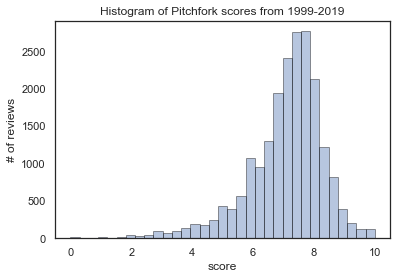

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='white')
sns.distplot(df['score'], bins=int(10/0.3), kde=False, hist_kws={'edgecolor':'black'})
plt.title("Histogram of Pitchfork scores from 1999-2019")
plt.xlabel('score')
plt.ylabel('# of reviews')
plt.show()

The distribution of scores shows a strong left skew, which suggests that reviewers at pitchfork generally give fairly high ratings with very few low ratings. It also looks like Pitchfork scores based on a normal distribution, where most scores are around 7.5.

We can also look at how the number of reviews has changed on a yearly basis.

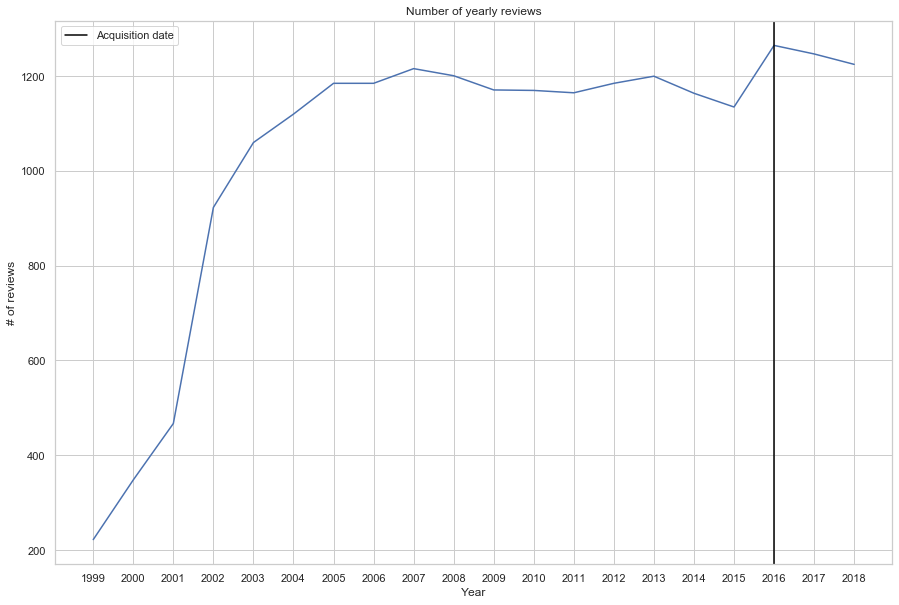

In [14]:
plt.figure(figsize=(15, 10))
years = range(1999, 2019)

sns.set(style='whitegrid')
num_reviews_per_year = []
for year in years:
    num_reviews_per_year.append(len(df[(df['year'] == year)].index))
sns.lineplot(years, num_reviews_per_year)

plt.axvline(x=2016, color='black', label='Acquisition date')
plt.xticks(years)
plt.title("Number of yearly reviews")
plt.xlabel("Year")
plt.ylabel("# of reviews")
plt.legend()
plt.show()

We can see that for about a decade before the acquisition the number of total reviews per year stayed relatively constant at around 1200, but right before the acquisition we can see a few years of volatility. This volatility in the number of reviews might be a sign that the company was in trouble and was trying new techniques in order to increase the number of visitors to the site.

Let's now analyze at the author's of these reviews and see if we can notice any trends in how the most popular reviewers give scores to albums over time. 

First let's see who are the most popular authors.

In [15]:
df['author'].value_counts()[0:10]

Joe Tangari           817
Ian Cohen             787
Stephen M. Deusner    759
Stuart Berman         533
Brian Howe            514
Mark Richardson       491
Marc Hogan            456
Andy Beta             370
Nate Patrin           359
Marc Masters          349
Name: author, dtype: int64

In [16]:
total_num_authors = len(df['author'].value_counts())
num_reviews_20_percent = sum(df['author'].value_counts()[0:int(total_num_authors*0.2)])
print("Percent of total reviews written by top 20% of reviewers:", num_reviews_20_percent/len(df))

Percent of total reviews written by top 20% of reviewers: 0.8185694437790447


The top 20% of authors wrote 80% of the reviews. 

It would be interesting to see how the number of reviews written by the top authors change over time. I show this in the following chart by taking the top 10 most active authors and plotting the number of reviews written each year by each author.

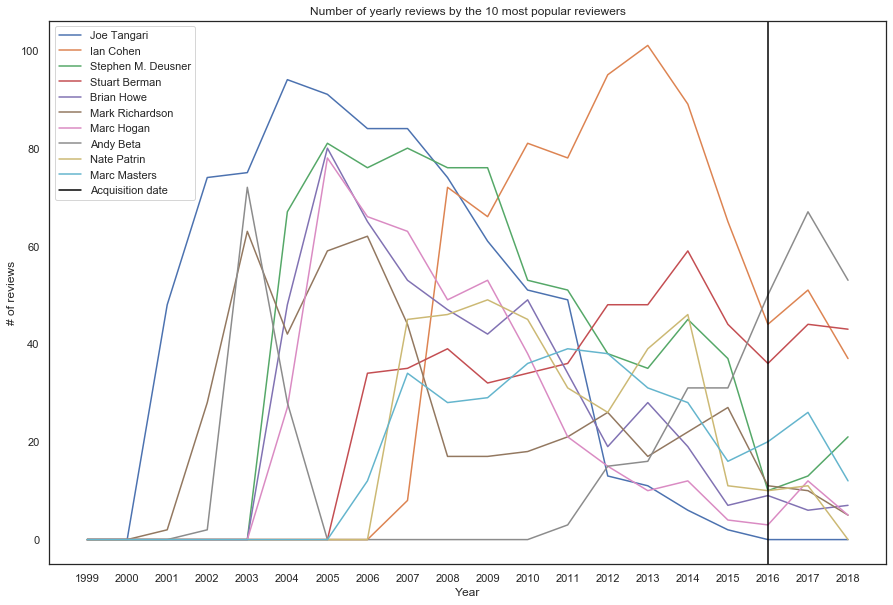

In [17]:
top_reviewers = df['author'].value_counts()[0:10].keys() #list of top reviewers in terms of number of reviews

sns.set(style='white')
plt.figure(figsize=(15, 10))
years = range(1999, 2019)
for reviewer in top_reviewers:
    num_reviews = []
    for year in years:
        num_reviews.append(len(df[(df['author'] == reviewer) & (df['year'] == year)].index))
    sns.lineplot(years, num_reviews, label=reviewer)

plt.axvline(x=2016, color='black', label='Acquisition date')
plt.xticks(years)
plt.title("Number of yearly reviews by the 10 most popular reviewers")
plt.xlabel("Year")
plt.ylabel("# of reviews")
plt.legend()
plt.show()

I also included a vertical line showing around the time Pitchfork was acquired. This chart shows that there was a steady decline in the number of reviews by top reviewers leading up the acquisition, and a slight uptick in the number of reviews post acquisition. If we refer back to the chart before showing the number of yearly reviews for the whole website, we see that this steady decline in reviews before the acquisition does not appear. This difference in trends in most likely due to the top reviewers being replaced with newer reviewers, so while the total number of reviews for the site stays relatively constant, the top reviewers review make fewer reviews.

Let's see how the number and ratio of albums given the Best New Music distinction has changed over time.

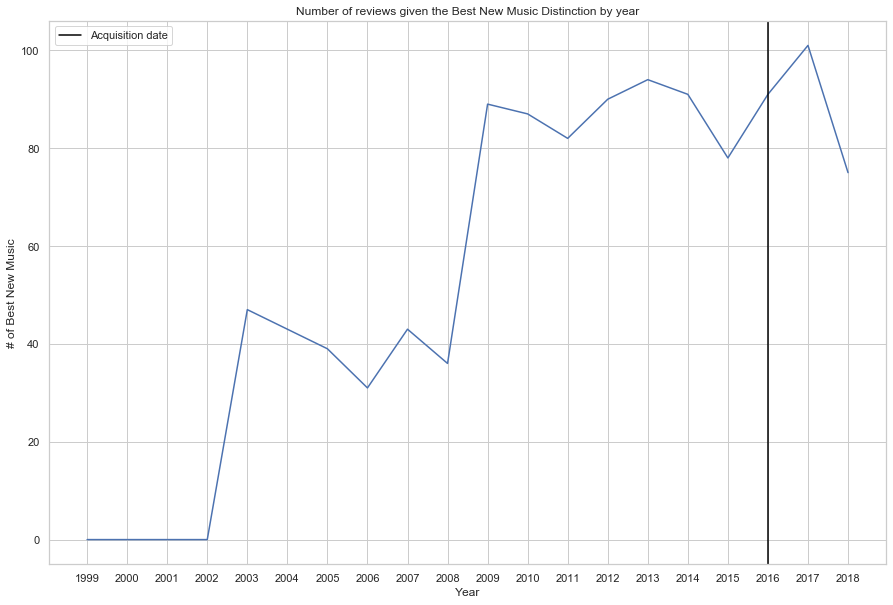

In [18]:
plt.figure(figsize=(15, 10))
years = range(1999, 2019)

sns.set(style='whitegrid')
bnm_per_year = []
for year in years:
    bnm_per_year.append(len(df[(df['year'] == year) & (df['bnm'] == 1)].index))
sns.lineplot(years, bnm_per_year)

plt.axvline(x=2016, color='black', label='Acquisition date')
plt.xticks(years)
plt.title("Number of reviews given the Best New Music Distinction by year")
plt.xlabel("Year")
plt.ylabel("# of Best New Music")
plt.legend()
plt.show()

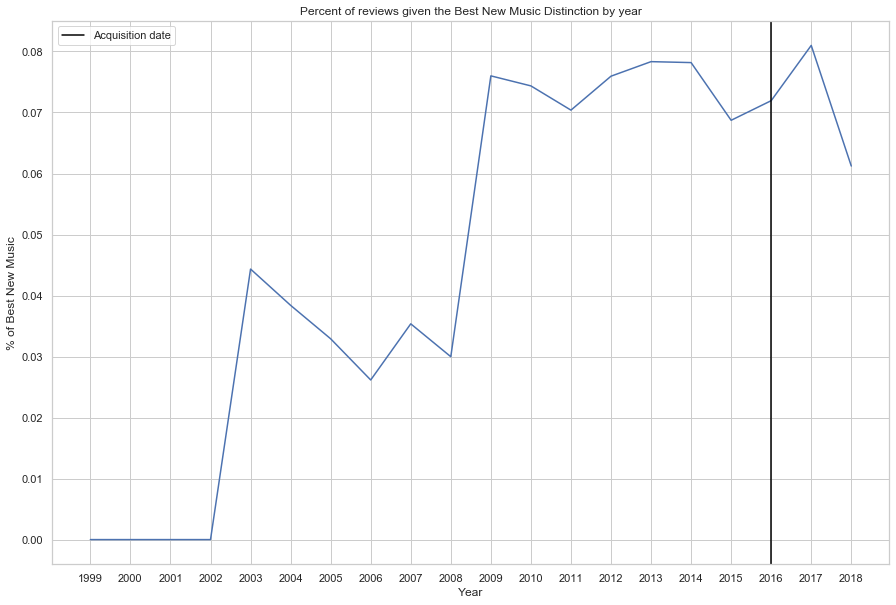

In [19]:
plt.figure(figsize=(15, 10))
bnm_ratio_per_year = [num_bnm / num_reviews for num_bnm,num_reviews in zip(bnm_per_year, num_reviews_per_year)]
sns.lineplot(years, bnm_ratio_per_year)

plt.axvline(x=2016, color='black', label='Acquisition date')
plt.xticks(years)
plt.title("Percent of reviews given the Best New Music Distinction by year")
plt.xlabel("Year")
plt.ylabel("% of Best New Music")
plt.legend()
plt.show()

We can notice a few interesting things here. Most notably, the doubling in the number of albums given the Best New Music distinction in the year 2009 and onward. It would be an interesting study to see what caused this doubling in the number of albums said to be Best New Music.

Another analysis that might be interesting is seeing if there is any bias in the scores depending on the genre of the album. Let first look at number of reviews in each genre.

In [20]:
df['genre'].value_counts()[0:20]

Rock                            7384
Electronic                      2464
                                2305
Rap                             1708
Pop/R&B                         1139
Electronic,Rock                 1064
Experimental                     891
Experimental,Rock                779
Folk/Country                     656
Metal                            450
Metal,Rock                       329
Jazz                             211
Electronic,Pop/R&B               166
Global                           129
Electronic,Experimental,Rock      97
Pop/R&B,Rock                      86
Pop/R&B,Rap                       77
Electronic,Jazz                   76
Electronic,Experimental           59
Experimental,Jazz                 56
Name: genre, dtype: int64

It looks like there are many albums that are given 2 genres. Let's ignore the albums with more than one genre and just focus on the albums with one genre. 

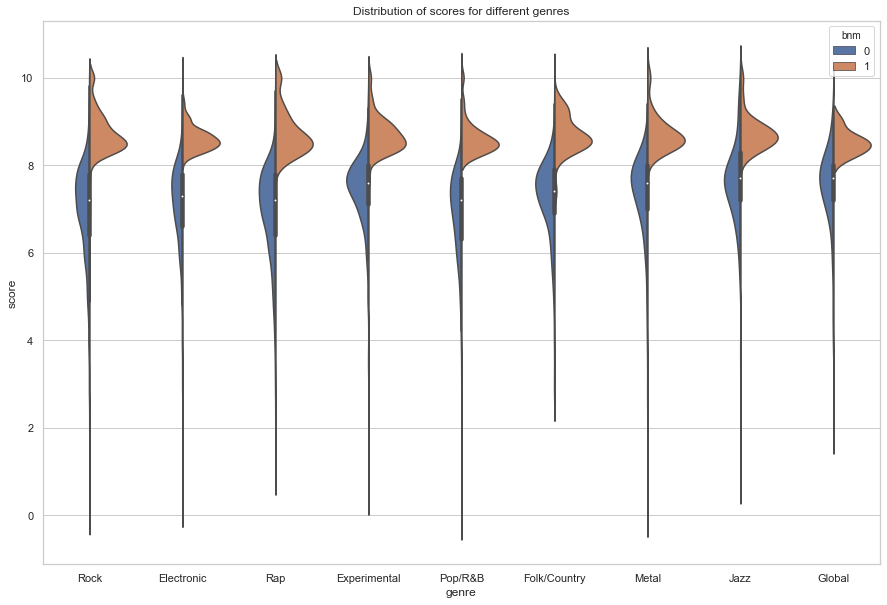

In [21]:
# genres that we are focusing on
genres = ['Rock', 'Electronic', 'Rap', 'Pop/R&B', 'Experimental', 'Folk/Country', 'Metal', 'Jazz', 'Global'] 

albums_with_genre = df[df['genre'].isin(genres)]
plt.figure(figsize=(15, 10))
sns.violinplot(x='genre', y='score', hue='bnm', data=albums_with_genre, split=True)
plt.title('Distribution of scores for different genres')
plt.show()

It does not look like there is any obvious bias in the scores in terms of the genre of the album. We do see that albums given the Best New Music distinction are in general given higher score than albums not given that distinction. 

Finally to conclude this section, lets look at how the average score per year has changed over time.

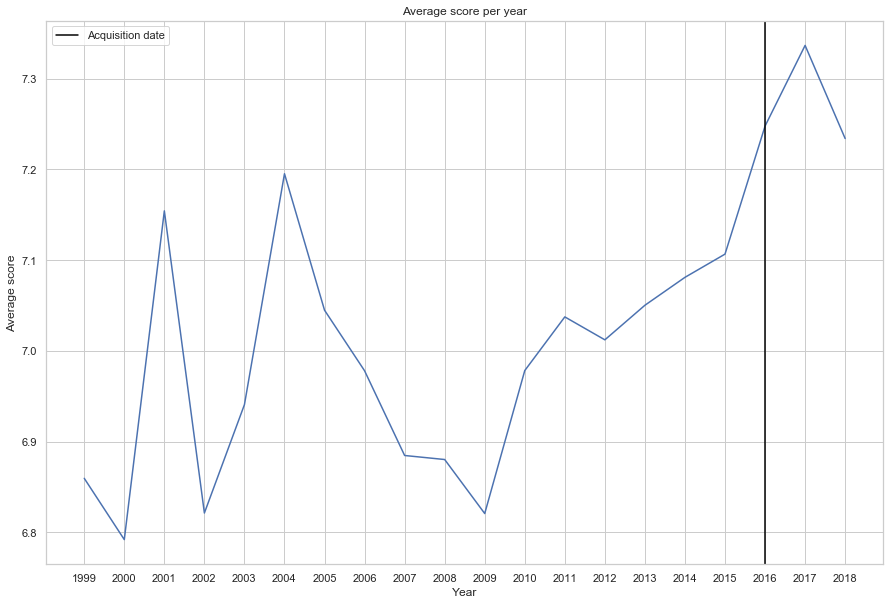

In [22]:
plt.figure(figsize=(15, 10))
years = range(1999, 2019)

sns.set(style='whitegrid')
average_scpre_per_year = []
for year in years:
    average_scpre_per_year.append((df[df['year'] == year]['score'].sum())/(len(df[(df['year'] == year)].index)))
sns.lineplot(years, average_scpre_per_year)

plt.axvline(x=2016, color='black', label='Acquisition date')
plt.xticks(years)
plt.title("Average score per year")
plt.xlabel("Year")
plt.ylabel("Average score")
plt.legend()
plt.show()

From this chart we see that there is has been a steady inflation in scores for around the past decade. Now that we've gotten to know the data a little bit. Lets split the data up into pre and post acquisition data sets and perform a hypothesis test to answer the stated question.

## Hypothesis Test

Lets first split the dataset based on the date of the acquisition.

In [71]:
acq_year = 2015
acq_month = 10

pre_acq = df[df['year'] < acq_year]
post_acq = df[df['year'] > acq_year]

pre_acq = pre_acq.append(df[(df['year'] == acq_year) & (df['month'] < acq_month)])
post_acq = post_acq.append(df[(df['year'] == acq_year) & (df['month'] >= acq_month)])

In [72]:
print("Pre Acquisition Descriptive Stats")
pre_acq['score'].describe()

Pre Acquisition Descriptive Stats


count    16877.000000
mean         6.983658
std          1.312171
min          0.000000
25%          6.400000
50%          7.200000
75%          7.800000
max         10.000000
Name: score, dtype: float64

In [73]:
print("Post Acquisition Descriptive Stats")
post_acq['score'].describe()

Post Acquisition Descriptive Stats


count    3996.000000
mean        7.274600
std         1.001155
min         1.600000
25%         6.800000
50%         7.400000
75%         7.800000
max        10.000000
Name: score, dtype: float64

It looks like we have much more pre acquisition data than post acquisition. The variance is pretty similar and the mean score is slightly higher post acquisition.

Let's check to see if these subsets still have a fairly normal distribution.

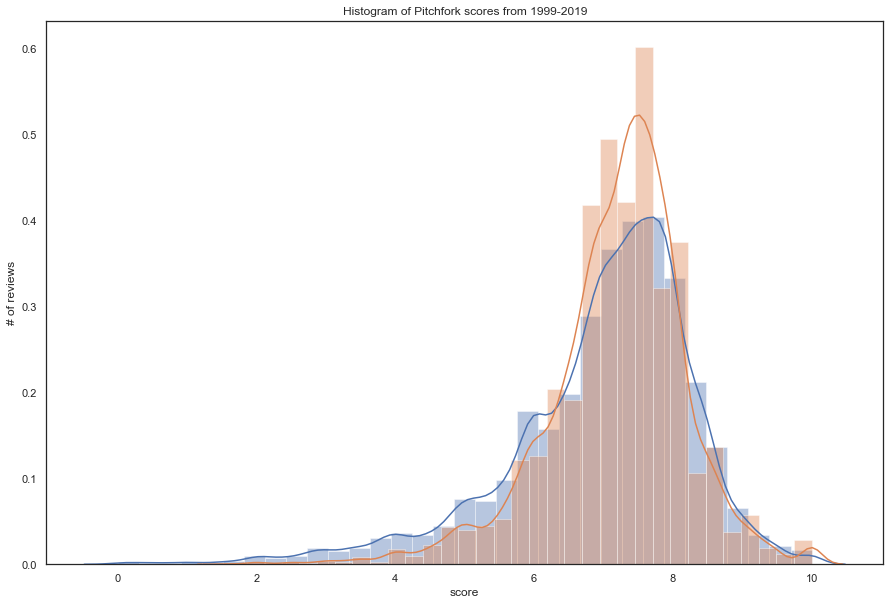

In [69]:
plt.figure(figsize=(15, 10))
sns.set(style='white')
sns.distplot(pre_acq['score'], bins=int(10/0.3), kde=True)
sns.distplot(post_acq['score'], bins=int(10/0.3), kde=True)
plt.title("Histogram of Pitchfork scores from 1999-2019")
plt.xlabel('score')
plt.ylabel('# of reviews')
plt.show()

Both of these datasets look pretty normal. This means that we can use the t-test since the assumptions of the test are met. I perform the t-test on a random sample of each pre and post acquisition datasets.

In [70]:
from scipy.stats import ttest_ind

pre_acq_samp = pre_acq.sample(1000)
post_acq_samp = post_acq.sample(1000)
ttest_ind(pre_acq_samp['score'], post_acq_samp['score'], equal_var=False)

Ttest_indResult(statistic=-6.003229215220352, pvalue=2.3376500166810873e-09)

## Conclusion

The result of the t-test is a p-value of less than the standard threshold of 0.05. So I reject the null hypothesis that states there is no difference between the scores given to albums pre and post acquisition. Even though there is a significant difference in the scores pre and post acquisition, this does not mean that this difference is caused by the acquisition. In one of the charts above, I show that the average yearly scores has steadily increased over time. This steady increase would most likely still have occured even if this acquisition had not occured. In conclusions, I significant difference in the score pre and post acquisition of Pitchfork shows significant different. However, this difference is most likely due to other factors that have caused scores to inflate over time over the lifetime of Pitchfork.